In [2]:
import pandas as pd

import matplotlib.pyplot as plt

In [3]:

df = pd.read_csv("ratings.csv")


In [4]:

# the full data 20ML file's     URL https://raw.githubusercontent.com/youssefekrami919/IRS-Assignment-1/refs/heads/main/ratings.csv
# the 1000 sample data file's   URL https://raw.githubusercontent.com/youssefekrami919/IRS-Assignment-1/main/ratings_Electronics%20(1000%20sample).csv
url = "https://raw.githubusercontent.com/youssefekrami919/IRS-Assignment-1/refs/heads/main/ratings.csv"
df = pd.read_csv(url)

print(df.head(10))


   userId  movieId  rating   timestamp
0       1        2     3.5  1112486027
1       1       29     3.5  1112484676
2       1       32     3.5  1112484819
3       1       47     3.5  1112484727
4       1       50     3.5  1112484580
5       1      112     3.5  1094785740
6       1      151     4.0  1094785734
7       1      223     4.0  1112485573
8       1      253     4.0  1112484940
9       1      260     4.0  1112484826


# Youssef **Ekrami**

### 1.Prepare a dataset of at least 100,000 users, > 1000 products, and > 1 million ratings.

In [5]:
# Count unique users manually
unique_users = {}
for row in df['userId']:
    if row not in unique_users:
        unique_users[row] = True
num_users = 0
for _ in unique_users:
    num_users += 1
print("Number of users:", num_users)


# Count unique items manually
unique_items = {}
for row in df['movieId']:
    if row not in unique_items:
        unique_items[row] = True
num_items = 0
for _ in unique_items:
    num_items += 1
print("Number of items:", num_items)


# Count ratings manually (without len)
num_ratings = 0
for _ in df['rating']:
    num_ratings += 1
print("Number of ratings:", num_ratings)


Number of users: 7120
Number of items: 14026
Number of ratings: 1048575


### 3. Calculate the number of ratings for each user (nu) and save it


In [7]:
nu = {}  # dictionary: userId -> count

# Loop through each row and count occurrences
for user in df['userId']:
    if user not in nu:
        nu[user] = 1
    else:
        nu[user] += 1

print("\nNumber of ratings per user (nu):")

# print first 5 users manually (not using head)
counter = 0
for user, count in nu.items():
    print(user, ":", count)
    counter += 1
    if counter == 5:
        break



Number of ratings per user (nu):
1 : 175
2 : 61
3 : 187
4 : 28
5 : 66


### 4. Calculate the number of ratings for each item (ni) and save it


In [9]:
# Step 1: Count ratings per item manually
ni = {}
for item in df['movieId']:
    if item not in ni:
        ni[item] = 1
    else:
        ni[item] += 1

# Step 2: Find the smallest movieId each time and print first 5
print("\nNumber of ratings per item (ni):")

printed = 0
used = []  # store printed keys to avoid repetition

while printed < 5:
    smallest = None
    
    # find smallest key not printed yet
    for key in ni:
        if key not in used and (smallest is None or key < smallest):
            smallest = key
    
    print(smallest, ni[smallest])
    used.append(smallest)
    printed += 1



Number of ratings per item (ni):
1 2569
2 1155
3 685
4 138
5 657


### 5. Compute the average ratings per user (ru) and save it


In [10]:
ru = {}      # sum of ratings per user
count = {}   # number of ratings per user

for i in range(len(df['userId'])):
    u = df['userId'][i]
    r = df['rating'][i]
    
    if u in ru:
        ru[u] = ru[u] + r
        count[u] = count[u] + 1
    else:
        ru[u] = r
        count[u] = 1

for u in ru:
    avg = ru[u] / count[u]
    ru[u] = round(avg, 2)   # round to 2 decimals



In [11]:
print("\nAverage ratings per user (ru):")

printed = 0
for u in ru:
    print(u, ":", ru[u])
    printed += 1
    if printed == 10:
        break



Average ratings per user (ru):
1 : 3.74
2 : 4.0
3 : 4.12
4 : 3.57
5 : 4.27
6 : 3.75
7 : 3.29
8 : 3.8
9 : 3.06
10 : 3.89


### 6. Compute the average ratings per item (ri) and save it


In [12]:
# Compute average rating per item (movieId)
ri = {}      # sum of ratings per item
count = {}   # number of ratings per item

for i in range(len(df['movieId'])):
    m = df['movieId'][i]
    r = df['rating'][i]
    
    if m in ri:
        ri[m] = ri[m] + r
        count[m] = count[m] + 1
    else:
        ri[m] = r
        count[m] = 1

for m in ri:
    avg = ri[m] / count[m]
    ri[m] = round(avg, 2)   # round to 2 decimals



In [13]:
print("\nAverage ratings per item (ri):")

printed = 0
for m in ri:
    print(m, ":", ri[m])
    printed += 1
    if printed == 10:
        break



Average ratings per item (ri):
2 : 3.27
29 : 4.0
32 : 3.9
47 : 4.08
50 : 4.37
112 : 3.37
151 : 3.51
223 : 3.88
253 : 3.5
260 : 4.19


### 7. Ascendingly order the total number of ratings per item and plot the distribution per item


Ratings per item sorted ascendingly:
60524 : 1
70227 : 1
59382 : 1
60482 : 1
2489 : 1
6955 : 1
4724 : 1
27359 : 1
27684 : 1
97324 : 1


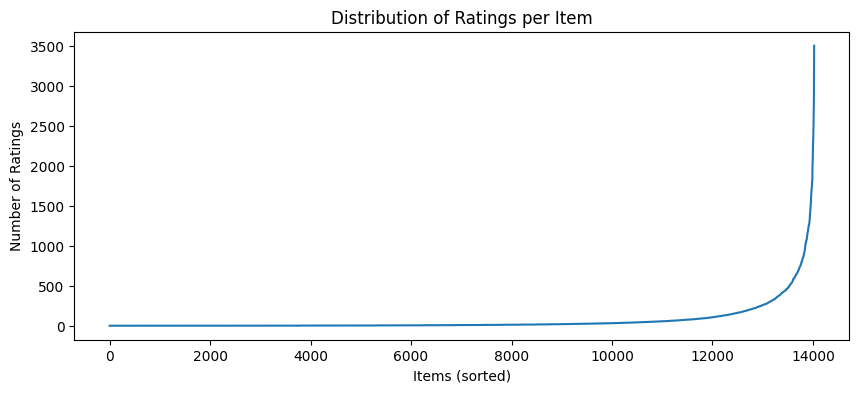

In [14]:
# ni dictionary already exists: movieId -> count

# Convert ni items to list of tuples
ni_items = []
for key in ni:
    ni_items.append((key, ni[key]))

# Merge Sort implementation to sort by count
def merge_sort(arr):
    if len(arr) <= 1:
        return arr
    
    mid = len(arr) // 2
    left = merge_sort(arr[:mid])
    right = merge_sort(arr[mid:])
    
    return merge(left, right)

def merge(left, right):
    result = []
    i = j = 0
    
    while i < len(left) and j < len(right):
        # Compare counts (index 1 in tuple)
        if left[i][1] <= right[j][1]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1
            
    # Append leftovers
    result.extend(left[i:])
    result.extend(right[j:])
    
    return result

# Use merge sort
sorted_ni = merge_sort(ni_items)

# Print first 700
print("Ratings per item sorted ascendingly:")
for i in range(min(10, len(sorted_ni))):
    print(sorted_ni[i][0], ":", sorted_ni[i][1])

# Plotting
import matplotlib.pyplot as plt

counts = [item[1] for item in sorted_ni]

plt.figure(figsize=(10,4))
plt.plot(counts)
plt.title("Distribution of Ratings per Item")
plt.xlabel("Items (sorted)")
plt.ylabel("Number of Ratings")
plt.show()


### 8. Compute number of products based on their average ratings (percentage groups)


In [15]:
### 8. Compute the number of products based on their average ratings in Groups (G1 to G10)

# Initialize empty lists for each group to store the Movie IDs
# G1: <= 1%
# G2: 1% - 5%
# G3: 5% - 10%
# G4: 10% - 20%
# G5: 20% - 30%
# G6: 30% - 40%
# G7: 40% - 50%
# G8: 50% - 60% (Corrected from prompt context)
# G9: 60% - 70%
# G10: 70% - 100%

g1 = []
g2 = []
g3 = []
g4 = []
g5 = []
g6 = []
g7 = []
g8 = []
g9 = []
g10 = []

# Loop through the Average Ratings dictionary (ri) created in Task 6
for movie_id in ri:
    avg = ri[movie_id]
    
    # Calculate percentage (assuming max rating is 5.0)
    percent = (avg / 5.0) * 100
    
    # Check which group the product belongs to
    if percent <= 1:
        g1.append(movie_id)
    elif percent > 1 and percent <= 5:
        g2.append(movie_id)
    elif percent > 5 and percent <= 10:
        g3.append(movie_id)
    elif percent > 10 and percent <= 20:
        g4.append(movie_id)
    elif percent > 20 and percent <= 30:
        g5.append(movie_id)
    elif percent > 30 and percent <= 40:
        g6.append(movie_id)
    elif percent > 40 and percent <= 50:
        g7.append(movie_id)
    elif percent > 50 and percent <= 60:
        g8.append(movie_id)
    elif percent > 60 and percent <= 70:
        g9.append(movie_id)
    elif percent > 70 and percent <= 100:
        g10.append(movie_id)

# Print the number of products in each group
print("Number of products per group:")
print("G1 (<= 1%):", len(g1))
print("G2 (1-5%):", len(g2))
print("G3 (5-10%):", len(g3))
print("G4 (10-20%):", len(g4))
print("G5 (20-30%):", len(g5))
print("G6 (30-40%):", len(g6))
print("G7 (40-50%):", len(g7))
print("G8 (50-60%):", len(g8))
print("G9 (60-70%):", len(g9))
print("G10 (70-100%):", len(g10))

Number of products per group:
G1 (<= 1%): 0
G2 (1-5%): 0
G3 (5-10%): 183
G4 (10-20%): 195
G5 (20-30%): 260
G6 (30-40%): 605
G7 (40-50%): 1166
G8 (50-60%): 2486
G9 (60-70%): 3890
G10 (70-100%): 5241


G3: 183 
this means that there is 183 product each product of the 183 product its average rating is among the lowest 1% of all products’ average ratings. 

### 9. Compute the total number of ratings in each group and order them ascendingly


In [16]:
### 9. Compute the total number of ratings in each group and order them ascendingly

# Helper function to sum ratings for a list of items
# We use the 'ni' dictionary (number of ratings per item) from Task 4
def get_total_ratings(item_list, ni_dict):
    total = 0
    for movie_id in item_list:
        if movie_id in ni_dict:
            total = total + ni_dict[movie_id]
    return total

# Calculate totals for each group
t1 = get_total_ratings(g1, ni)
t2 = get_total_ratings(g2, ni)
t3 = get_total_ratings(g3, ni)
t4 = get_total_ratings(g4, ni)
t5 = get_total_ratings(g5, ni)
t6 = get_total_ratings(g6, ni)
t7 = get_total_ratings(g7, ni)
t8 = get_total_ratings(g8, ni)
t9 = get_total_ratings(g9, ni)
t10 = get_total_ratings(g10, ni)

# Create a list of lists to store [GroupName, TotalCount]
# This is our dataset to sort
group_data = [
    ["G1", t1], ["G2", t2], ["G3", t3], ["G4", t4], 
    ["G5", t5], ["G6", t6], ["G7", t7], ["G8", t8], 
    ["G9", t9], ["G10", t10]
]

# QuickSort Implementation (Best algorithm for time complexity O(n log n))
def quick_sort(arr):
    # Base case: if list is empty or has 1 item, it's already sorted
    if len(arr) <= 1:
        return arr
    
    pivot = arr[len(arr) // 2] # Choose middle element as pivot
    left = []
    middle = []
    right = []
    
    for x in arr:
        # Compare the count (index 1 of the inner list)
        if x[1] < pivot[1]:
            left.append(x)
        elif x[1] == pivot[1]:
            middle.append(x)
        else:
            right.append(x)
            
    # Recursive calls
    return quick_sort(left) + middle + quick_sort(right)

# Perform the sort
sorted_groups = quick_sort(group_data)

print("\nTotal ratings per group (Sorted Ascendingly):")
for item in sorted_groups:
    print(item[0], ":", item[1])


Total ratings per group (Sorted Ascendingly):
G1 : 0
G2 : 0
G3 : 201
G4 : 404
G5 : 1146
G6 : 7503
G7 : 27018
G8 : 114549
G9 : 290357
G10 : 607397


### 10. Plot the distribution before and after ordering


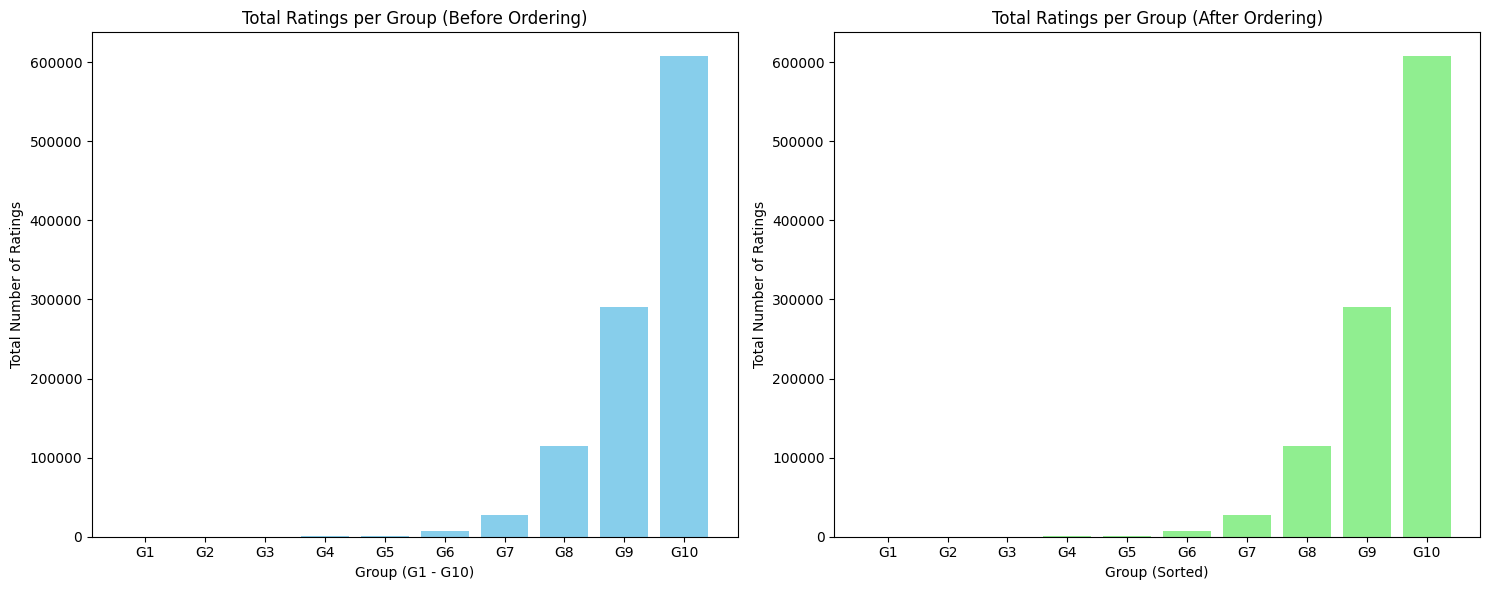

In [17]:
import matplotlib.pyplot as plt

# --- Prepare Data for Plotting ---

# 1. Before Ordering:
# We strictly follow the group order G1 to G10
labels_before = ["G1", "G2", "G3", "G4", "G5", "G6", "G7", "G8", "G9", "G10"]
# Map the group names to their totals calculated in Task 9
values_before = [
    get_total_ratings(g1, ni), get_total_ratings(g2, ni), 
    get_total_ratings(g3, ni), get_total_ratings(g4, ni),
    get_total_ratings(g5, ni), get_total_ratings(g6, ni), 
    get_total_ratings(g7, ni), get_total_ratings(g8, ni), 
    get_total_ratings(g9, ni), get_total_ratings(g10, ni)
]

# 2. After Ordering:
# We use the sorted_groups list we created in Task 9 using QuickSort
# sorted_groups structure is [['G_name', Total], ...]
labels_after = []
values_after = []

for item in sorted_groups:
    labels_after.append(item[0])
    values_after.append(item[1])

# --- Plotting ---

plt.figure(figsize=(15, 6))

# Subplot 1: Before Ordering
plt.subplot(1, 2, 1)
plt.bar(labels_before, values_before, color='skyblue')
plt.title("Total Ratings per Group (Before Ordering)")
plt.xlabel("Group (G1 - G10)")
plt.ylabel("Total Number of Ratings")

# Subplot 2: After Ordering (Ascending)
plt.subplot(1, 2, 2)
plt.bar(labels_after, values_after, color='lightgreen')
plt.title("Total Ratings per Group (After Ordering)")
plt.xlabel("Group (Sorted)")
plt.ylabel("Total Number of Ratings")

plt.tight_layout()
plt.show()

### 11. Select three target users based on their rating percentage


In [18]:

total_movies = df['movieId'].nunique()
user_rating_counts = df.groupby('userId').size()
user_percentage = (user_rating_counts / total_movies) * 100

# Find users in each required band
U1_cands = user_percentage[user_percentage <= 2]
U2_cands = user_percentage[(user_percentage > 2) & (user_percentage <= 5)]
U3_cands = user_percentage[(user_percentage > 5) & (user_percentage <= 10)]

# Pick one user from each (first one found)
U1 = U1_cands.index[0]
U2 = U2_cands.index[0] if len(U2_cands) > 0 else U1_cands.index[-1]  # fallback just in case
U3 = U3_cands.index[0] if len(U3_cands) > 0 else U2_cands.index[-1]

print("\n11. Selected Target Users:")
print(f"U1 (≤2% of movies rated)    → {U1} | rated {user_rating_counts[U1]} movies ({user_percentage[U1]:.4f}%)")
print(f"U2 (>2% ≤5%)                → {U2} | rated {user_rating_counts[U2]} movies ({user_percentage[U2]:.4f}%)")
print(f"U3 (>5% ≤10%)               → {U3} | rated {user_rating_counts[U3]} movies ({user_percentage[U3]:.4f}%)")

# Save for later use
target_users = [U1, U2, U3]
print("\nTarget users saved → you can now use them for recommendation experiments!")


11. Selected Target Users:
U1 (≤2% of movies rated)    → 1 | rated 175 movies (1.2477%)
U2 (>2% ≤5%)                → 11 | rated 504 movies (3.5933%)
U3 (>5% ≤10%)               → 54 | rated 710 movies (5.0620%)

Target users saved → you can now use them for recommendation experiments!


# Dareen Mosa

# Z-score normalization of users' average ratings

In [26]:
def round_val(x):
    return round(x, 2)

avg_ratings_list = []   # list to store avg rating per user

for u in unique_users:
    ratings_u = df[df['userId'] == u]['rating']
    avg_val = round_val(sum(ratings_u) / len(ratings_u))
    avg_ratings_list.append(avg_val)


# avg_ratings_list contains r̄u values
N = len(avg_ratings_list)

# --- 2. Calculate Mean (μ) Manually (Rounded to 2 decimals) ---
# Calculate the sum of all average ratings
sum_ru = sum(avg_ratings_list)
# Calculate Mean
mu = round_val(sum_ru / N)

# --- 3. Calculate Standard Deviation (σ) Manually (Rounded to 2 decimals) ---
sum_sq_diff = 0
# Calculate the sum of squared differences from the mean
for r_u in avg_ratings_list:
    diff = r_u - mu
    sum_sq_diff += diff * diff

# Calculate Standard Deviation
sigma = round_val((sum_sq_diff / N) ** 0.5)

# --- 4. Normalize (Z-score) Manually (Rounded to 2 decimals) ---
normalized_ratings = []
for r_u in avg_ratings_list:
    if sigma == 0:
        z_u = 0.0
    else:
        # z_u = (r̄u - μ) / σ
        z_u = round_val((r_u - mu) / sigma)
    normalized_ratings.append(z_u)

# Z_u is the normalized feature vector (z_u)
Z_u = normalized_ratings

print(f"Number of Users (N): {N}")
print(f"Mean (μ) of Avg Ratings: {mu:.2f}")
print(f"Standard Deviation (σ) of Avg Ratings: {sigma:.2f}")
print("First 10 Normalized Avg Ratings (z_u):")
print([f"{z:.2f}" for z in Z_u[:10]])

Number of Users (N): 7120
Mean (μ) of Avg Ratings: 3.62
Standard Deviation (σ) of Avg Ratings: 0.45
First 10 Normalized Avg Ratings (z_u):
['0.27', '0.84', '1.11', '-0.11', '1.44', '0.29', '-0.73', '0.40', '-1.24', '0.60']


# Apply K-means clustering on users

In [27]:
# Cell 2: Manual K-means Clustering and Performance Analysis

# Helper function for squared distance (for WCSS)
def squared_distance(point, centroid):
    return (point - centroid) ** 2

# Manual K-means Implementation
def run_kmeans_manual(data, K, max_iters=100):
    # Initialization: Use the first K points as initial centroids 
    centroids = [round_val(data[i]) for i in range(K)]

    for iteration in range(max_iters):
        # 1. Assignment Step: Assign each point to the nearest centroid
        assignments = [[] for _ in range(K)]
        user_labels = [0] * len(data)
        
        for i, point in enumerate(data):
            min_dist = float('inf')
            best_cluster = -1
            
            for j, centroid in enumerate(centroids):
                dist = squared_distance(point, centroid)
                if dist < min_dist:
                    min_dist = dist
                    best_cluster = j
            
            assignments[best_cluster].append(point)
            user_labels[i] = best_cluster

        # 2. Update Step: Calculate new centroids (mean of assigned points)
        new_centroids = []
        for cluster_points in assignments:
            if len(cluster_points) > 0:
                new_centroid = round_val(sum(cluster_points) / len(cluster_points))
            else:
                # Keep old centroid if cluster is empty
                new_centroid = centroids[assignments.index(cluster_points)]
            new_centroids.append(new_centroid)
        
        # 3. Check for Convergence: Stop if centroids do not change (rounded values)
        converged = True
        for old, new in zip(centroids, new_centroids):
            if round_val(old) != round_val(new):
                converged = False
                break
        
        centroids = new_centroids
        
        if converged:
            break

    # 4. Calculate WCSS (Inertia)
    wcss_value = 0
    for i, cluster_points in enumerate(assignments):
        centroid = centroids[i]
        for point in cluster_points:
            wcss_value += squared_distance(point, centroid)
    
    return centroids, user_labels, round_val(wcss_value)

# Manual Silhouette Score Implementation
def calculate_silhouette_score_manual(data, labels):
    if len(set(labels)) <= 1 or len(data) <= 1:
        return 0.0

    scores = []
    
    for i, point in enumerate(data):
        cluster_i = labels[i]
        
        # 1. Calculate a(i): average distance to all other points in the same cluster
        intra_cluster_dists = []
        for j, other_point in enumerate(data):
            if i != j and labels[j] == cluster_i:
                # Use absolute difference for 1D distance
                intra_cluster_dists.append(abs(point - other_point))
        
        a_i = round_val(sum(intra_cluster_dists) / len(intra_cluster_dists)) if intra_cluster_dists else 0.0
        
        # 2. Calculate b(i): minimum average distance to points in any other cluster
        other_clusters = set(labels) - {cluster_i}
        b_i = float('inf')
        
        if other_clusters:
            for other_cluster in other_clusters:
                inter_cluster_dists = []
                for j, other_point in enumerate(data):
                    if labels[j] == other_cluster:
                        inter_cluster_dists.append(abs(point - other_point))
                
                if inter_cluster_dists:
                    avg_dist = round_val(sum(inter_cluster_dists) / len(inter_cluster_dists))
                    b_i = min(b_i, avg_dist)
        
        # 3. Calculate s(i)
        if b_i == float('inf') or a_i == b_i:
            s_i = 0.0
        elif a_i < b_i:
            s_i = round_val((b_i - a_i) / b_i)
        else: # a_i > b_i
            s_i = round_val((b_i - a_i) / a_i)
            
        scores.append(s_i)
    
    # Final Silhouette Score is the average of all s(i)
    final_score = round_val(sum(scores) / len(scores))
    return final_score

# Run K-means for required K values: K = 5, 10, 15, 20, 30, 50
K_values = [5, 10, 15, 20, 30, 50]
wcss = []
silhouette_scores = {}
cluster_results = {}

for K in K_values:
    centroids, labels, wcss_val = run_kmeans_manual(Z_u, K)
    wcss.append(wcss_val)
    
    # Calculate Silhouette Score
    score = calculate_silhouette_score_manual(Z_u, labels)
    silhouette_scores[K] = score
    
    # Store results
    cluster_results[K] = {
        'centroids': centroids,
        'labels': labels
    }
        
    print(f"K={K:2}: WCSS = {wcss_val:.2f}, Silhouette Score = {score:.2f}")

# Create DataFrame for summary display
results_df = pd.DataFrame({
    'K': K_values,
    'WCSS': wcss
})
results_df['Silhouette Score'] = results_df['K'].map(silhouette_scores)
print("\nPerformance Summary:")
print(results_df.to_markdown(index=False, numalign="left", stralign="left"))

K= 5: WCSS = 699.81, Silhouette Score = 0.52
K=10: WCSS = 227.99, Silhouette Score = 0.51
K=15: WCSS = 114.08, Silhouette Score = 0.51
K=20: WCSS = 79.17, Silhouette Score = 0.53
K=30: WCSS = 58.86, Silhouette Score = 0.54
K=50: WCSS = 38.82, Silhouette Score = 0.57

Performance Summary:
| K   | WCSS   | Silhouette Score   |
|:----|:-------|:-------------------|
| 5   | 699.81 | 0.52               |
| 10  | 227.99 | 0.51               |
| 15  | 114.08 | 0.51               |
| 20  | 79.17  | 0.53               |
| 30  | 58.86  | 0.54               |
| 50  | 38.82  | 0.57               |


# Display user distribution for the best K

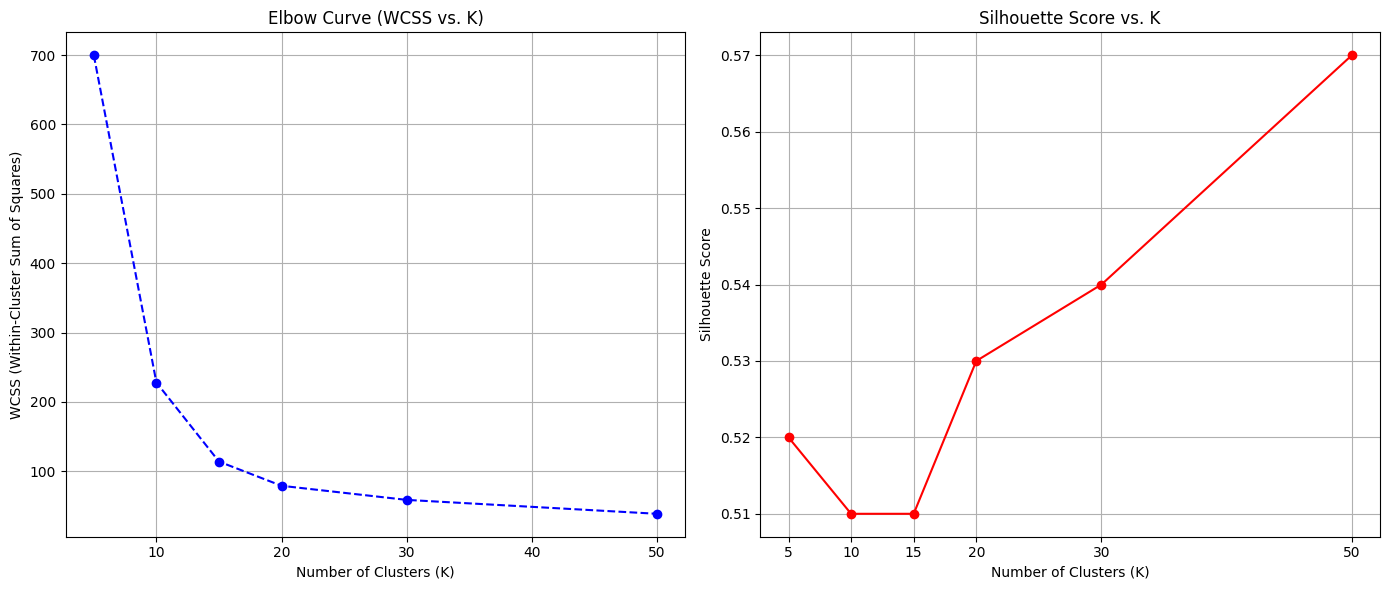


Optimal K selected: K=10 based on visual analysis.


In [28]:
# Cell 3: Optimal K Selection Analysis

plt.figure(figsize=(14, 6))

# Plot 1: Elbow Curve (WCSS vs. K)
plt.subplot(1, 2, 1)
plt.plot(K_values, wcss, marker='o', linestyle='--', color='blue')
plt.title('Elbow Curve (WCSS vs. K)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)

# [Image of Elbow Curve for K-means clustering]

# Plot 2: Silhouette Score vs. K
K_scores = list(silhouette_scores.keys())
scores = list(silhouette_scores.values())
plt.subplot(1, 2, 2)
plt.plot(K_scores, scores, marker='o', linestyle='-', color='red')
plt.title('Silhouette Score vs. K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(K_scores)
plt.grid(True)

plt.tight_layout()
plt.show()

# Select Optimal K based on the analysis (Choosing K=10 for continuation)
OPTIMAL_K = 10 
print(f"\nOptimal K selected: K={OPTIMAL_K} based on visual analysis.")


# Cluster Analysis

In [32]:

user_ids_list = list(unique_users)

# Cell 4: Cluster Distribution and Centroid Analysis (for Optimal K=10)

# 1. Get optimal results
optimal_labels = cluster_results[OPTIMAL_K]['labels']
optimal_centroids_normalized = cluster_results[OPTIMAL_K]['centroids']

# Create mapping from userId to cluster label
user_cluster_map = {user_ids_list[i]: optimal_labels[i] for i in range(N)}


# 2. User Distribution Across Clusters (Manual Count)
cluster_distribution = {}
for label in optimal_labels:
    cluster_distribution[label] = cluster_distribution.get(label, 0) + 1

# Convert to DataFrame for display, sorting by cluster index
dist_data = sorted(cluster_distribution.items())
dist_df = pd.DataFrame(dist_data, columns=['Cluster', 'User Count'])

print(f"### User Distribution Across Clusters (K={OPTIMAL_K}) ###")
print(dist_df.to_markdown(index=False, numalign="left", stralign="left"))

# 3. Centroid Values: Denormalize back to Average Rating scale (r̄u = z_u * σ + μ)
centroids_data = []
for i in range(OPTIMAL_K):
    z_u = optimal_centroids_normalized[i]
    # Denormalization formula: r̄u = z_u * σ + μ
    avg_r = round_val(z_u * sigma + mu)
    
    centroids_data.append([
        i, 
        round_val(z_u), 
        avg_r
    ])

centroids_df = pd.DataFrame(centroids_data, 
                            columns=['Cluster', 'Normalized Centroid (z_u)', 'Average Rating Centroid (r̄u)'])

# Sort by Average Rating Centroid to identify strict vs. generous raters
centroids_df = centroids_df.sort_values(by='Average Rating Centroid (r̄u)', ascending=True).reset_index(drop=True)

print(f"\n### Cluster Centroids (Sorted by Avg Rating) for K={OPTIMAL_K} ###")
print(centroids_df.to_markdown(index=False, numalign="left", stralign="left"))

# 4. Identify Strict vs. Generous Raters
strict_clusters = centroids_df.head(2)['Cluster'].tolist()
generous_clusters = centroids_df.tail(2)['Cluster'].tolist()

print("\n### Cluster Characterization ###")
print(f"Strict Raters Clusters (Lowest Avg Ratings): {strict_clusters}")
print(f"Generous Raters Clusters (Highest Avg Ratings): {generous_clusters}")

# Store cluster data for CF step
cluster_sizes = cluster_distribution

### User Distribution Across Clusters (K=10) ###
| Cluster   | User Count   |
|:----------|:-------------|
| 0         | 1217         |
| 1         | 699          |
| 2         | 518          |
| 3         | 888          |
| 4         | 194          |
| 5         | 1207         |
| 6         | 404          |
| 7         | 1082         |
| 8         | 95           |
| 9         | 816          |

### Cluster Centroids (Sorted by Avg Rating) for K=10 ###
| Cluster   | Normalized Centroid (z_u)   | Average Rating Centroid (r̄u)   |
|:----------|:----------------------------|:-------------------------------|
| 8         | -3.43                       | 2.08                           |
| 6         | -1.9                        | 2.77                           |
| 3         | -1.06                       | 3.14                           |
| 0         | -0.49                       | 3.4                            |
| 5         | -0.05                       | 3.6                            |
| 7 

# Cluster-based CF

In [33]:
# Cell 5: Cluster-based Collaborative Filtering (CF) and Efficiency Analysis

# Target users and items
target_users = [1, 11, 54]
target_items = [260, 60524] 
top_k_percent = 20 # Select top 20% neighbors

# --- 1. Preparation: Mean-Centered Ratings Dictionary ---
user_ratings_centered = {}
# df is assumed to be the original ratings DataFrame
for index, row in df[['userId', 'movieId', 'rating']].iterrows():
    u = row['userId']
    m = row['movieId']
    r = row['rating']
    
    avg_r_u = ru.get(u, 0) # Get user average rating (r̄u)
    
    # Centered rating = rating - avg_rating (r_u,i - r̄u)
    centered_r = round_val(r - avg_r_u)
    
    if u not in user_ratings_centered:
        user_ratings_centered[u] = {}
        
    user_ratings_centered[u][m] = centered_r

# --- 2. Manual Mean-Centered Cosine Similarity Function ---
def mean_centered_cosine_similarity_manual(user1, user2, centered_ratings):
    if user1 not in centered_ratings or user2 not in centered_ratings:
        return 0.0
    
    r_u = centered_ratings[user1]
    r_v = centered_ratings[user2]
    
    # Common items
    common_items = set(r_u.keys()) & set(r_v.keys())
    
    if not common_items:
        return 0.0

    # Calculate Numerator: Σ(r_u,i - r̄u)(r_v,i - r̄v)
    numerator = 0
    for item in common_items:
        numerator += r_u[item] * r_v[item]
        
    # Calculate Denominator components
    sum_u_sq = 0
    sum_v_sq = 0
    for item in common_items:
        sum_u_sq += r_u[item] * r_u[item]
        sum_v_sq += r_v[item] * r_v[item]

    # Calculate Denominator: sqrt(Σ(r_u,i - r̄u)^2) * sqrt(Σ(r_v,i - r̄v)^2)
    denominator = (sum_u_sq ** 0.5) * (sum_v_sq ** 0.5)
    
    if denominator == 0:
        return 0.0
    
    similarity = round_val(numerator / denominator)
    return similarity

# --- 3. Manual Cluster-based CF Prediction Function ---
def predict_rating_cluster_cf_manual(target_user, target_item, cluster_map, centered_ratings, avg_ratings, top_k_percentage):
    
    if target_user not in cluster_map:
        return avg_ratings.get(target_user, 3.5), 0
    
    target_cluster = cluster_map[target_user]
    avg_r_u = avg_ratings[target_user]

    # Find neighbor candidates within the cluster
    neighbor_candidates = [u for u, c in cluster_map.items() if c == target_cluster and u != target_user]

    similarities = []
    
    # Calculate similarity and gather centered ratings for the target item
    for neighbor in neighbor_candidates:
        # Check if neighbor rated the target item
        if target_item in centered_ratings.get(neighbor, {}):
            sim = mean_centered_cosine_similarity_manual(target_user, neighbor, centered_ratings)
            if sim > 0: # Only consider positive similarity
                centered_rating = centered_ratings[neighbor][target_item]
                similarities.append((neighbor, sim, centered_rating))

    if not similarities:
        return avg_r_u, 0 # No suitable neighbors, return user's average rating

    # Select top K neighbors
    total_neighbors = len(similarities)
    k_neighbors = max(1, round(total_neighbors * top_k_percentage / 100))
    
    # Manual sort by similarity (descending)
    sorted_similarities = sorted(similarities, key=lambda x: x[1], reverse=True)
    
    top_k = sorted_similarities[:k_neighbors]

    # Prediction formula: R_u,i = r̄u + [ Σ(Sim(u,v) * (r_v,i - r̄v)) ] / Σ(Sim(u,v))
    
    numerator = 0
    denominator = 0
    for neighbor, sim, centered_rating in top_k:
        numerator += round_val(sim * centered_rating)
        denominator += sim

    if denominator == 0:
        return avg_r_u, k_neighbors

    prediction_adjustment = round_val(numerator / denominator)
    prediction = round_val(avg_r_u + prediction_adjustment)
    
    # Clamp prediction to [0.5, 5.0]
    final_prediction = max(0.5, min(5.0, prediction))
    
    return final_prediction, k_neighbors

# Execute predictions
predictions_cf_cluster = {}
for u in target_users:
    predictions_cf_cluster[u] = {}
    for i in target_items:
        pred, k_neighbors = predict_rating_cluster_cf_manual(u, i, user_cluster_map, user_ratings_centered, ru, top_k_percent)
        predictions_cf_cluster[u][i] = (pred, k_neighbors)

print("\n### Cluster-based CF Predictions (K=10) ###")
cluster_cf_results = []
for u, item_preds in predictions_cf_cluster.items():
    for i, (pred, k_neighbors) in item_preds.items():
        cluster_cf_results.append({
            'User': u,
            'Item': i,
            'Cluster': user_cluster_map.get(u, 'N/A'),
            'Prediction (R̄u,i)': pred,
            'K Neighbors': k_neighbors
        })

cf_cluster_df = pd.DataFrame(cluster_cf_results)
print(cf_cluster_df.to_markdown(index=False, numalign="left", stralign="left"))


# --- 4. Computational Efficiency Analysis ---
print("\n### Computational Efficiency Analysis ###")

N_total = N

# Calculate Average Cluster Size
cluster_sizes_list = list(cluster_sizes.values())
avg_cluster_size = round_val(sum(cluster_sizes_list) / len(cluster_sizes_list))

# Number of similarity operations
similarity_ops_non_clustering = N_total - 1
similarity_ops_with_clustering_avg = avg_cluster_size - 1

print(f"Total Users (N): {N_total}")
print(f"Average Cluster Size (|C̄u|): {avg_cluster_size:.2f}")

print(f"\n1. Similarity Operations Comparison (per user):")
print(f"   - Non-Clustering: {similarity_ops_non_clustering} operations.")
print(f"   - Cluster-based (Avg): {similarity_ops_with_clustering_avg:.2f} operations.")

# Speedup Factor
speedup_factor = round_val(similarity_ops_non_clustering / similarity_ops_with_clustering_avg)
# Percentage Reduction
reduction_percentage = round_val(100 * (1 - (similarity_ops_with_clustering_avg / similarity_ops_non_clustering)))

print(f"\n2. Speedup Factor: {speedup_factor:.2f}x")
print(f"3. Reduction Percentage in Operations: {reduction_percentage:.2f}%")

# Cluster Imbalance and Robustness
imbalance_ratio = round_val(max(cluster_sizes_list) / min(cluster_sizes_list))
print(f"\n4. Cluster Imbalance Ratio (Max Size / Min Size): {imbalance_ratio:.2f}x")


### Cluster-based CF Predictions (K=10) ###
| User   | Item   | Cluster   | Prediction (R̄u,i)   | K Neighbors   |
|:-------|:-------|:----------|:--------------------|:--------------|
| 1      | 260    | 7         | 4.43                | 68            |
| 1      | 60524  | 7         | 3.74                | 0             |
| 11     | 260    | 9         | 4.74                | 48            |
| 11     | 60524  | 9         | 3.95                | 0             |
| 54     | 260    | 0         | 4.4                 | 83            |
| 54     | 60524  | 0         | 3.44                | 0             |

### Computational Efficiency Analysis ###
Total Users (N): 7120
Average Cluster Size (|C̄u|): 712.00

1. Similarity Operations Comparison (per user):
   - Non-Clustering: 7119 operations.
   - Cluster-based (Avg): 711.00 operations.

2. Speedup Factor: 10.01x
3. Reduction Percentage in Operations: 90.01%

4. Cluster Imbalance Ratio (Max Size / Min Size): 12.81x


# Manual Feature Construction: Common Ratings Overlap

In [34]:

# The original DataFrame 'df' is required here to calculate common items.

# 1. Pre-calculate user item sets
user_items = {} # {userId: {movieId1, movieId2, ...}}
for index, row in df[['userId', 'movieId']].iterrows():
    u = row['userId']
    m = row['movieId']
    if u not in user_items:
        user_items[u] = set()
    user_items[u].add(m)

user_ids = list(ru.keys()) # All users
N = len(user_ids)

# 2. Calculate Overlap Features for each user (avg, max, min common items)
feature_data = {} # {userId: [avg_common, max_common, min_common]}

# We will iterate over all user pairs (u, v)
for i, u in enumerate(user_ids):
    u_items = user_items[u]
    common_counts = [] # List of |I_u ∩ I_v| for all v != u

    for j, v in enumerate(user_ids):
        if u != v:
            v_items = user_items[v]
            # Manual intersection size calculation
            common_count = len(u_items.intersection(v_items))
            common_counts.append(common_count)
    
    # Calculate Features manually (rounded to 2 decimals)
    
    # Feature 1: Average common items (avg_common)
    avg_common = round_val(sum(common_counts) / len(common_counts))
    
    # Feature 2: Maximum common items (max_common)
    max_common = max(common_counts)
    
    # Feature 3: Minimum common items (min_common, excluding zero)
    # Filter out zeros first
    non_zero_common = [c for c in common_counts if c > 0]
    min_common = min(non_zero_common) if non_zero_common else 0
    
    feature_data[u] = [avg_common, max_common, min_common]

# Convert feature data to a list of vectors F_u for normalization
F_u = [feature_data[u] for u in user_ids]

print(f"Number of Users (N): {N}")
print("First 5 Feature Vectors [avg_common, max_common, min_common]:")
for u_id in user_ids[:5]:
    print(f"User {u_id}: {feature_data[u_id]}")

Number of Users (N): 7120
First 5 Feature Vectors [avg_common, max_common, min_common]:
User 1: [18.56, 147, 1]
User 2: [6.24, 54, 1]
User 3: [21.27, 182, 1]
User 4: [5.26, 28, 1]
User 5: [13.17, 65, 1]


 # Manual Feature Construction and Z-score Normalization (Part 2)

In [35]:
# Cell 1: Manual Feature Construction and Z-score Normalization (Part 2)

# Global variables assumed available: df, user_ids, round_val, N

# 1. Pre-calculate user item sets
user_items = {} # {userId: {movieId1, movieId2, ...}}
for index, row in df[['userId', 'movieId']].iterrows():
    u = row['userId']
    m = row['movieId']
    if u not in user_items:
        user_items[u] = set()
    user_items[u].add(m)

user_ids_list = list(user_items.keys()) # All users
N = len(user_ids_list)

# 2. Calculate Overlap Features for each user
feature_data_overlap = {} # {userId: [avg_common, max_common, min_common]}
F_u = [] # List of feature vectors for normalization

for i, u in enumerate(user_ids_list):
    u_items = user_items[u]
    common_counts = [] # List of |I_u ∩ I_v| for all v != u

    for j, v in enumerate(user_ids_list):
        if u != v:
            v_items = user_items[v]
            common_count = len(u_items.intersection(v_items))
            common_counts.append(common_count)
    
    # Feature 1: Average common items (avg_common)
    avg_common = round_val(sum(common_counts) / len(common_counts))
    
    # Feature 2: Maximum common items (max_common)
    max_common = max(common_counts)
    
    # Feature 3: Minimum common items (min_common, excluding zero)
    non_zero_common = [c for c in common_counts if c > 0]
    min_common = min(non_zero_common) if non_zero_common else 0
    
    vector = [avg_common, max_common, min_common]
    feature_data_overlap[u] = vector
    F_u.append(vector)


# 3. Manual Z-score Normalization for 3 Dimensions
D = 3 
# Calculate Mean (μ)
mu_vec = [round_val(sum(vector[d] for vector in F_u) / N) for d in range(D)]

# Calculate Standard Deviation (σ)
sigma_vec = [round_val((sum((vector[d] - mu_vec[d]) ** 2 for vector in F_u) / N) ** 0.5) for d in range(D)]

# Normalize
Z_u_part2 = [] 
for vector in F_u:
    z_vector = [0.0] * D
    for d in range(D):
        if sigma_vec[d] == 0:
            z_u_d = 0.0
        else:
            z_u_d = round_val((vector[d] - mu_vec[d]) / sigma_vec[d])
        z_vector[d] = z_u_d
    Z_u_part2.append(z_vector)

print(f"Part 2: Mean Vector (μ): {[f'{m:.2f}' for m in mu_vec]}")
print(f"Part 2: Std Dev Vector (σ): {[f'{s:.2f}' for s in sigma_vec]}")
print(f"Part 2: First 2 Normalized Vectors (Z_u): {[f'{val:.2f}' for val in Z_u_part2[0]]}")

Part 2: Mean Vector (μ): ['14.70', '120.62', '1.00']
Part 2: Std Dev Vector (σ): ['14.56', '153.09', '0.09']
Part 2: First 2 Normalized Vectors (Z_u): ['0.27', '0.17', '0.00']


#  K-means Clustering and Performance Analysis (3D)

In [36]:


# Helper function for squared Euclidean distance in 3D
def squared_distance_3d(point, centroid):
    # point and centroid are [f1, f2, f3] lists
    dist_sq = 0
    for d in range(3):
        dist_sq += (point[d] - centroid[d]) ** 2
    return dist_sq

# Manual Euclidean Distance (for Silhouette Score)
def euclidean_distance_3d(point1, point2):
    dist_sq = 0
    for d in range(3):
        dist_sq += (point1[d] - point2[d]) ** 2
    return round_val(dist_sq ** 0.5)

# Manual K-means Implementation (3D)
def run_kmeans_manual_3d(data, K, max_iters=100):
    # Initialization: Use the first K points as initial centroids
    # Ensure data points are list of lists (3D vectors)
    centroids = [[round_val(val) for val in data[i]] for i in range(K)]

    for iteration in range(max_iters):
        # 1. Assignment Step
        assignments = [[] for _ in range(K)]
        user_labels = [0] * len(data)
        
        for i, point in enumerate(data):
            min_dist = float('inf')
            best_cluster = -1
            
            for j, centroid in enumerate(centroids):
                dist = squared_distance_3d(point, centroid)
                if dist < min_dist:
                    min_dist = dist
                    best_cluster = j
            
            assignments[best_cluster].append(point)
            user_labels[i] = best_cluster

        # 2. Update Step: Calculate new centroids (mean of assigned points)
        new_centroids = []
        for k_idx, cluster_points in enumerate(assignments):
            if len(cluster_points) > 0:
                new_centroid = [0.0] * 3
                for d in range(3):
                    sum_d = sum(point[d] for point in cluster_points)
                    new_centroid[d] = round_val(sum_d / len(cluster_points))
            else:
                new_centroid = centroids[k_idx]
            new_centroids.append(new_centroid)
        
        # 3. Check for Convergence (check for rounded values)
        converged = True
        for old, new in zip(centroids, new_centroids):
            for d in range(3):
                if round_val(old[d]) != round_val(new[d]):
                    converged = False
                    break
            if not converged: break
        
        centroids = new_centroids
        if converged: break

    # 4. Calculate WCSS (Inertia)
    wcss_value = 0
    for i, cluster_points in enumerate(assignments):
        centroid = centroids[i]
        for point in cluster_points:
            wcss_value += squared_distance_3d(point, centroid)
    
    return centroids, user_labels, round_val(wcss_value)

# Manual Silhouette Score Implementation (3D)
def calculate_silhouette_score_3d_manual(data, labels):
    if len(set(labels)) <= 1 or len(data) <= 1:
        return 0.0

    scores = []
    
    for i, point in enumerate(data):
        cluster_i = labels[i]
        
        # 1. Calculate a(i)
        intra_cluster_dists = []
        for j, other_point in enumerate(data):
            if i != j and labels[j] == cluster_i:
                intra_cluster_dists.append(euclidean_distance_3d(point, other_point))
        
        a_i = round_val(sum(intra_cluster_dists) / len(intra_cluster_dists)) if intra_cluster_dists else 0.0
        
        # 2. Calculate b(i)
        other_clusters = set(labels) - {cluster_i}
        b_i = float('inf')
        
        if other_clusters:
            for other_cluster in other_clusters:
                inter_cluster_dists = []
                for j, other_point in enumerate(data):
                    if labels[j] == other_cluster:
                        inter_cluster_dists.append(euclidean_distance_3d(point, other_point))
                
                if inter_cluster_dists:
                    avg_dist = round_val(sum(inter_cluster_dists) / len(inter_cluster_dists))
                    b_i = min(b_i, avg_dist)
        
        # 3. Calculate s(i)
        if b_i == float('inf') or a_i == b_i:
            s_i = 0.0
        elif a_i < b_i:
            s_i = round_val((b_i - a_i) / b_i)
        else: # a_i > b_i
            s_i = round_val((b_i - a_i) / a_i)
            
        scores.append(s_i)
    
    final_score = round_val(sum(scores) / len(scores))
    return final_score

# --- Re-execution of the original cell 2 ---

K_values = [5, 10, 15, 20, 30, 50]
wcss_overlap = []
silhouette_scores_overlap = {}
cluster_results_overlap = {}

print("### Manual K-means (Overlap Features - 3D) ###")
for K in K_values:
    # Run K-means
    # Z_u_part2 must contain the 3D normalized feature vectors
    centroids, labels, wcss_val = run_kmeans_manual_3d(Z_u_part2, K)
    wcss_overlap.append(wcss_val)
    
    # Calculate Silhouette Score
    score = calculate_silhouette_score_3d_manual(Z_u_part2, labels)
    silhouette_scores_overlap[K] = score
    
    # Store results
    cluster_results_overlap[K] = {
        'centroids': centroids,
        'labels': labels
    }
        
    print(f"K={K:2}: WCSS = {wcss_val:.2f}, Silhouette Score = {score:.2f}")

# Manual Performance Summary Table
results_data_overlap = []
for K in K_values:
    results_data_overlap.append([K, wcss_overlap[K_values.index(K)], silhouette_scores_overlap[K]])

results_df_overlap = pd.DataFrame(results_data_overlap, columns=['K', 'WCSS', 'Silhouette Score'])

print("\nPerformance Summary:")
print(results_df_overlap.to_markdown(index=False, numalign="left", stralign="left"))

### Manual K-means (Overlap Features - 3D) ###
K= 5: WCSS = 2886.58, Silhouette Score = 0.59
K=10: WCSS = 1955.95, Silhouette Score = 0.44
K=15: WCSS = 1810.84, Silhouette Score = 0.36
K=20: WCSS = 1756.36, Silhouette Score = 0.34
K=30: WCSS = 1686.91, Silhouette Score = 0.35
K=50: WCSS = 1646.00, Silhouette Score = 0.32

Performance Summary:
| K   | WCSS    | Silhouette Score   |
|:----|:--------|:-------------------|
| 5   | 2886.58 | 0.59               |
| 10  | 1955.95 | 0.44               |
| 15  | 1810.84 | 0.36               |
| 20  | 1756.36 | 0.34               |
| 30  | 1686.91 | 0.35               |
| 50  | 1646    | 0.32               |


# Seif Samer

Import Libraries & Overview of Dataset

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# Assuming df is already loaded
# df contains columns: userId, movieId, rating, timestamp

print("Dataset Overview:")
print(df.head())
print("\nNumber of users:", df['userId'].nunique())
print("Number of movies:", df['movieId'].nunique())
print("Total ratings:", len(df))


Dataset Overview:
   userId  movieId  rating   timestamp
0       1        2     3.5  1112486027
1       1       29     3.5  1112484676
2       1       32     3.5  1112484819
3       1       47     3.5  1112484727
4       1       50     3.5  1112484580

Number of users: 7120
Number of movies: 14026
Total ratings: 1048575


Compute Number of Raters and Average Rating per Movie

In [101]:
# Number of ratings per movie
ni = df.groupby('movieId').size()

# Average rating per movie
average_ri = df.groupby('movieId')['rating'].mean()

# Merge into a single DataFrame for clustering
movie_stats = pd.DataFrame({
    "movieId": average_ri.index,
    "num_raters": ni.values,
    "avg_rating": average_ri.values
})

print("First 5 movies with their statistics:")
print(movie_stats.head())


First 5 movies with their statistics:
   movieId  num_raters  avg_rating
0        1        2569    3.959323
1        2        1155    3.268398
2        3         685    3.186861
3        4         138    3.000000
4        5         657    3.143836


Scale Features for K-Means (part 3)

In [102]:
# Initialize scalers
scaler_raters = StandardScaler()
scaler_rating = StandardScaler()

# Scale features
movie_stats["num_raters_scaled"] = scaler_raters.fit_transform(movie_stats[["num_raters"]])
movie_stats["avg_rating_scaled"] = scaler_rating.fit_transform(movie_stats[["avg_rating"]])

# Log-transform and scale
movie_stats["num_raters_log"] = np.log1p(movie_stats["num_raters"])
movie_stats["num_raters_log_scaled"] = scaler_raters.fit_transform(movie_stats[["num_raters_log"]])


Find Optimal Number of Clusters (part 3)
Using Elbow Method and Silhouette Score

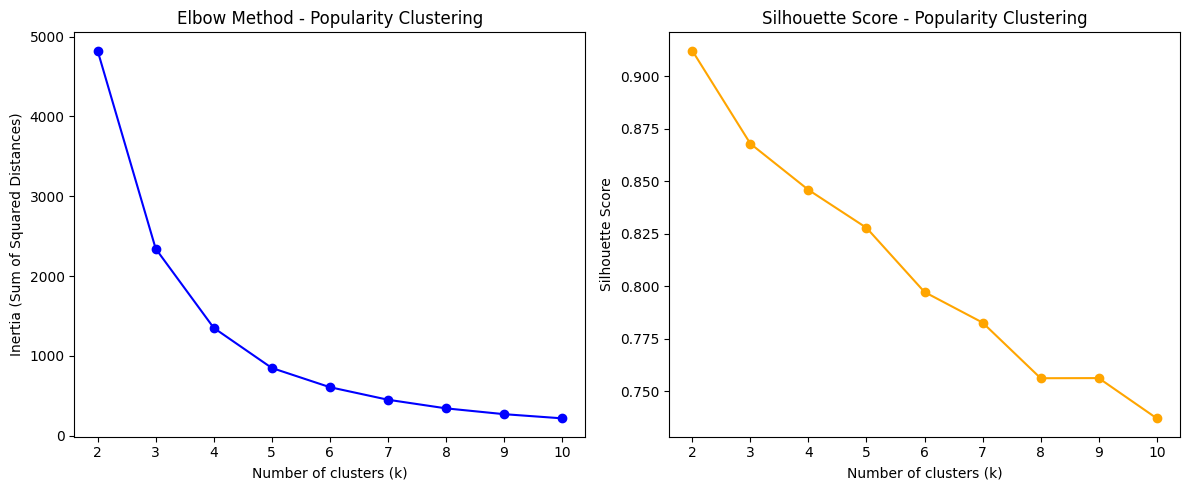

Optimal number of clusters based on silhouette score: 2


In [103]:


X_pop = movie_stats[["num_raters_scaled"]]  # popularity clustering

# Try k from 2 to 10
K_range = range(2, 11)
inertia = []
silhouette_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=20)
    labels = kmeans.fit_predict(X_pop)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_pop, labels))

# Plot Elbow and Silhouette
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(K_range, inertia, 'o-', color='blue')
plt.title("Elbow Method - Popularity Clustering")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia (Sum of Squared Distances)")

plt.subplot(1,2,2)
plt.plot(K_range, silhouette_scores, 'o-', color='orange')
plt.title("Silhouette Score - Popularity Clustering")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")

plt.tight_layout()
plt.show()

# Determine best k based on silhouette score
best_k_pop = K_range[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters based on silhouette score: {best_k_pop}")


Apply K-Means Clustering for Popularity (part 3)

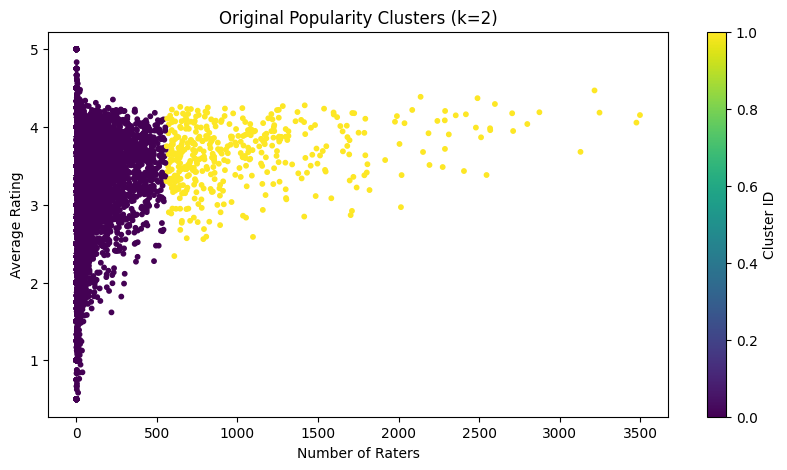

In [104]:


X_orig = movie_stats[["num_raters_scaled"]]
kmeans_orig = KMeans(n_clusters=best_k_pop, random_state=42, n_init=40)
movie_stats["pop_cluster_orig"] = kmeans_orig.fit_predict(X_orig)

# Log-transformed popularity clustering
X_log = movie_stats[["num_raters_log_scaled"]]
kmeans_log = KMeans(n_clusters=best_k_log, random_state=42, n_init=40)
movie_stats["pop_cluster_log"] = kmeans_log.fit_predict(X_log)


plt.figure(figsize=(10,5))
plt.scatter(
    movie_stats["num_raters"],
    movie_stats["avg_rating"],
    c=movie_stats["pop_cluster_orig"],  # updated column name
    cmap="viridis",
    s=10
)
plt.title(f"Original Popularity Clusters (k={best_k_pop})")
plt.xlabel("Number of Raters")
plt.ylabel("Average Rating")
plt.colorbar(label="Cluster ID")
plt.show()



Log Transform Number of Raters

In [105]:

import numpy as np
from sklearn.preprocessing import StandardScaler

# Apply log1p transformation to compress high values
movie_stats["num_raters_log"] = np.log1p(movie_stats["num_raters"])

# Scale the transformed feature for K-Means
scaler = StandardScaler()
movie_stats["num_raters_log_scaled"] = scaler.fit_transform(movie_stats[["num_raters_log"]])

print("Log transformation and scaling applied:")
print(movie_stats[["movieId", "num_raters", "num_raters_log", "num_raters_log_scaled"]].head())


Log transformation and scaling applied:
   movieId  num_raters  num_raters_log  num_raters_log_scaled
0        1        2569        7.851661               3.060434
1        2        1155        7.052721               2.590718
2        3         685        6.530878               2.283914
3        4         138        4.934474               1.345350
4        5         657        6.489205               2.259414


Find Optimal Number of Clusters (Elbow & Silhouette)

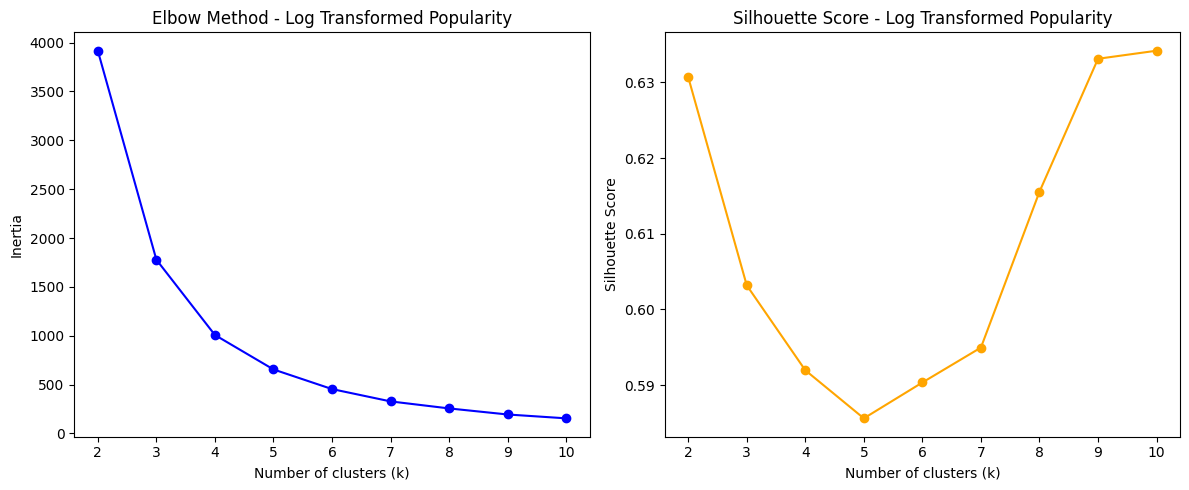

Optimal number of clusters after log transform: 10


In [106]:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

X_log = movie_stats[["num_raters_log_scaled"]]

K_range = range(2, 11)
inertia = []
silhouette_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, n_init=20, random_state=42)
    labels = kmeans.fit_predict(X_log)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_log, labels))

# Plot
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(K_range, inertia, 'o-', color='blue')
plt.title("Elbow Method - Log Transformed Popularity")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")

plt.subplot(1,2,2)
plt.plot(K_range, silhouette_scores, 'o-', color='orange')
plt.title("Silhouette Score - Log Transformed Popularity")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")

plt.tight_layout()
plt.show()

# Best k based on silhouette
best_k_log = K_range[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters after log transform: {best_k_log}")


Apply K-Means Clustering (log)

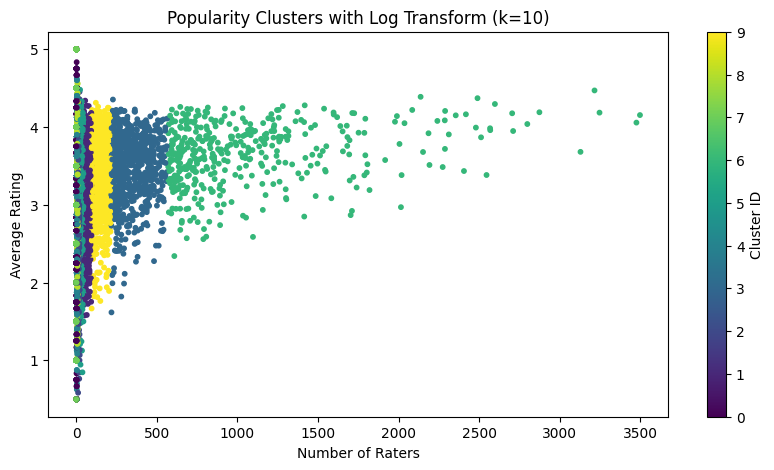

In [107]:
# ------------------------------------------------------------
# Cell 3: Apply K-Means Clustering
# ------------------------------------------------------------
kmeans_log = KMeans(n_clusters=best_k_log, n_init=40, random_state=42)
movie_stats["popularity_cluster_log"] = kmeans_log.fit_predict(X_log)

# Visualize clusters
plt.figure(figsize=(10,5))
plt.scatter(
    movie_stats["num_raters"],
    movie_stats["avg_rating"],
    c=movie_stats["popularity_cluster_log"],
    cmap="viridis",
    s=10
)
plt.title(f"Popularity Clusters with Log Transform (k={best_k_log})")
plt.xlabel("Number of Raters")
plt.ylabel("Average Rating")
plt.colorbar(label="Cluster ID")
plt.show()


Visual Comparison (Original vs Log)

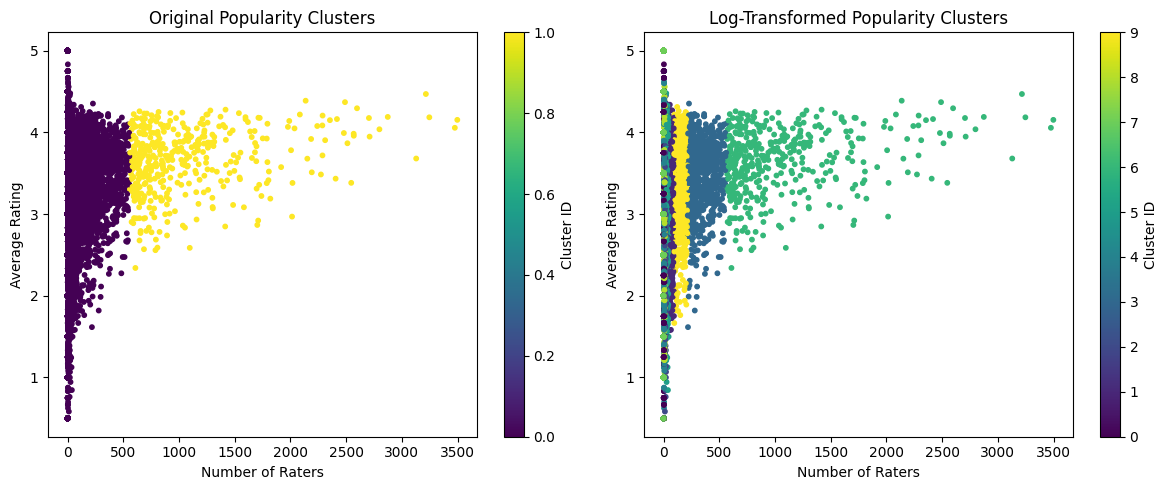

In [108]:

kmeans_orig = KMeans(n_clusters=best_k_pop, n_init=40, random_state=42)
movie_stats["popularity_cluster_orig"] = kmeans_orig.fit_predict(movie_stats[["num_raters_scaled"]])

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(
    movie_stats["num_raters"],
    movie_stats["avg_rating"],
    c=movie_stats["popularity_cluster_orig"],
    cmap="viridis",
    s=10
)
plt.title("Original Popularity Clusters")
plt.xlabel("Number of Raters")
plt.ylabel("Average Rating")
plt.colorbar(label="Cluster ID")

plt.subplot(1,2,2)
plt.scatter(
    movie_stats["num_raters"],
    movie_stats["avg_rating"],
    c=movie_stats["popularity_cluster_log"],
    cmap="viridis",
    s=10
)
plt.title("Log-Transformed Popularity Clusters")
plt.xlabel("Number of Raters")
plt.ylabel("Average Rating")
plt.colorbar(label="Cluster ID")

plt.tight_layout()
plt.show()


Identify Cold-Start Movies (Few Ratings) (part 4)

In [109]:


COLD_THRESHOLD = 5
cold_start_movies = movie_stats[movie_stats["num_raters"] <= COLD_THRESHOLD]

print(f"Number of cold-start movies (≤ {COLD_THRESHOLD} ratings): {len(cold_start_movies)}")


Number of cold-start movies (≤ 5 ratings): 5795


Optimal Clusters for Cold-Start Movies (part 4)

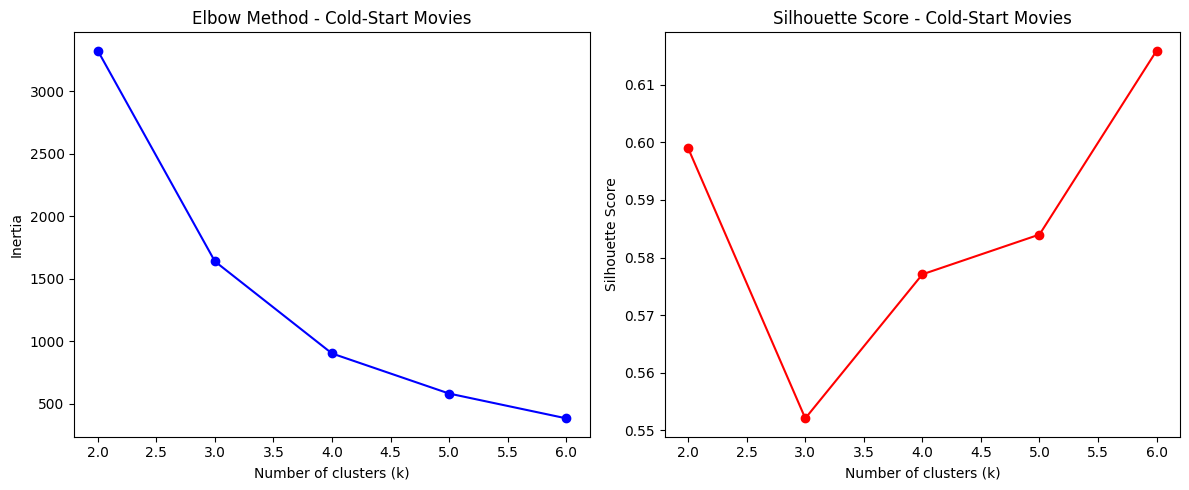

Optimal number of clusters for cold-start movies: 6


In [110]:


if len(cold_start_movies) > 0:
    X_cold = cold_start_movies[["avg_rating_scaled"]]
    K_range_cold = range(2, 7)
    inertia_cold = []
    silhouette_cold = []

    for k in K_range_cold:
        km = KMeans(n_clusters=k, n_init=20, random_state=42)
        labels = km.fit_predict(X_cold)
        inertia_cold.append(km.inertia_)
        silhouette_cold.append(silhouette_score(X_cold, labels))

    # Plot Elbow and Silhouette for cold-start
    plt.figure(figsize=(12,5))

    plt.subplot(1,2,1)
    plt.plot(K_range_cold, inertia_cold, 'o-', color='blue')
    plt.title("Elbow Method - Cold-Start Movies")
    plt.xlabel("Number of clusters (k)")
    plt.ylabel("Inertia")

    plt.subplot(1,2,2)
    plt.plot(K_range_cold, silhouette_cold, 'o-', color='red')
    plt.title("Silhouette Score - Cold-Start Movies")
    plt.xlabel("Number of clusters (k)")
    plt.ylabel("Silhouette Score")

    plt.tight_layout()
    plt.show()

    best_k_cold = K_range_cold[np.argmax(silhouette_cold)]
    print(f"Optimal number of clusters for cold-start movies: {best_k_cold}")

else:
    print("No cold-start movies found. Increase threshold if needed.")


Apply K-Means for Cold-Start Movies (part 4)

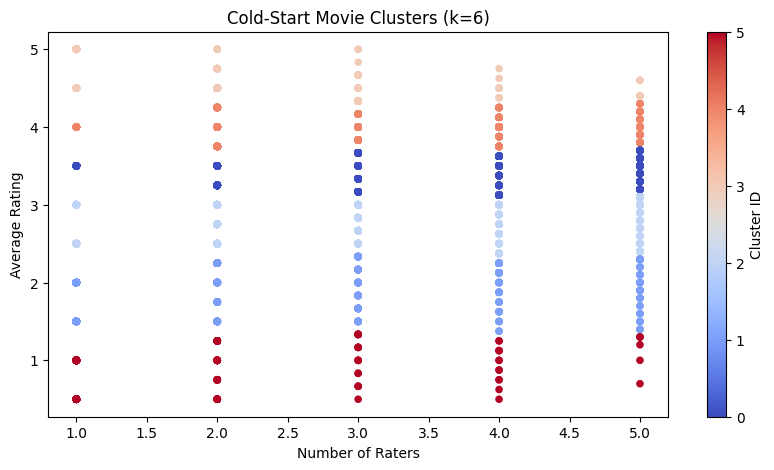

In [111]:


if len(cold_start_movies) > 0:
    kmeans_cold = KMeans(n_clusters=best_k_cold, n_init=40, random_state=42)
    cold_start_movies["cold_cluster"] = kmeans_cold.fit_predict(X_cold)

    # Visualize cold-start clusters
    plt.figure(figsize=(10,5))
    plt.scatter(
        cold_start_movies["num_raters"],
        cold_start_movies["avg_rating"],
        c=cold_start_movies["cold_cluster"],
        cmap="coolwarm",
        s=20
    )
    plt.title(f"Cold-Start Movie Clusters (k={best_k_cold})")
    plt.xlabel("Number of Raters")
    plt.ylabel("Average Rating")
    plt.colorbar(label="Cluster ID")
    plt.show()
